In [6]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam
from scipy.optimize import curve_fit

([-inf, 0, -inf], [inf, inf, inf])
Matrice di covarianza:
 [[ 2.16794543e-04  7.97998242e-06 -1.27246180e-04]
 [ 7.97998242e-06  1.53472954e-05  3.73879742e-05]
 [-1.27246180e-04  3.73879742e-05  2.07848217e-04]]
tau:  0.8625289758614857


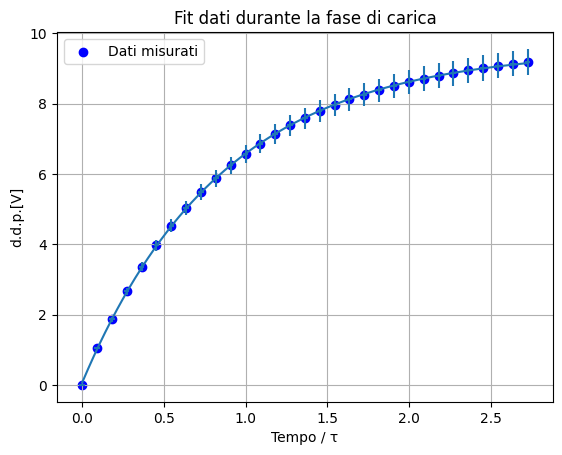

In [10]:
import Tiamat as tiam
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import norm
T = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480])/176  # secondi
V_car = np.array([0, 1.037, 1.867, 2.662, 3.364, 3.970, 4.526, 5.034, 5.494, 5.877, 6.246, 6.568, 6.860, 7.130, 7.380, 7.580, 7.790, 7.960, 8.120, 8.260, 8.380, 8.500, 8.610, 8.710, 8.800, 8.870, 8.950, 9.020, 9.080, 9.140, 9.190])  # velocità

err_T = 1/60
err_V_car = (V_car)/25

# Funzione da fittare
def func(t, V_0, tau,d):
    return V_0 * (1-np.exp(-t / tau))+d

bounds = ([-np.inf,0,-np.inf],[np.inf,np.inf,np.inf])
print(bounds)
Xfit,Yfit,a,b,c,cov_matrix = tiam.fit_curve(T,V_car,func,min(T),max(T),err_X=None,err_Y=None,limiti=bounds)
plt.plot(Xfit,Yfit)
print("tau: ",b)

plt.errorbar(T, V_car, xerr= err_T, yerr= err_V_car, fmt= 'none')

plt.scatter(T, V_car, label="Dati misurati", color="blue")
plt.xlabel("Tempo / τ")
plt.ylabel("d.d.p.[V]")
plt.title("Fit dati durante la fase di carica")
plt.legend()
plt.grid()
plt.show()

Parametri fittati: V_0 = 1.747, tau = -42607089.691


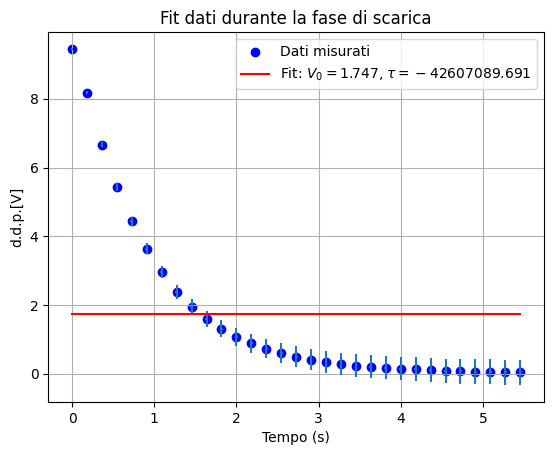

In [ ]:
T_1 = np.array([0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800, 832, 864, 896, 928, 960])/176 #sec
V_scar = np.array([9.45, 8.17, 6.66, 5.43, 4.430, 3.634, 2.967, 2.380, 1.942, 1.596, 1.307, 1.078, 0.885, 0.730, 0.604, 0.500, 0.413, 0.343, 0.286, 0.237, 0.210, 0.176, 0.148, 0.125, 0.106, 0.086, 0.073, 0.063, 0.054, 0.047, 0.042]) #V

err_T1 = 1/60
err_V_scar = (V_car)/25

# Funzione da fittare
def velocity_decay(t, V_0, tau):
    return V_0 * np.exp(-t / tau)

bounds = ([-np.inf,0,-np.inf],[np.inf,np.inf,np.inf])
print(bounds)
Xfit,Yfit,a,b,c,cov_matrix = tiam.fit_curve(T,V_car,func,min(T),max(T),err_X=None,err_Y=None,limiti=bounds)
plt.plot(Xfit,Yfit)
print("tau: ",b)

plt.errorbar(T_1, V_scar, xerr= err_T1, yerr= err_V_scar, fmt= 'none')

plt.scatter(T_1, V_scar, label="Dati misurati", color="blue")
plt.plot(Xfit, Yfit, label=f"Fit: $V_0 = {V_0_fit:.3f}$, $\\tau = {tau_fit:.3f}$", color="red")
plt.xlabel("Tempo (s)")
plt.ylabel("d.d.p.[V]")
plt.title("Fit dati durante la fase di scarica")
plt.legend()
plt.grid()
plt.show()

In [9]:
#96.72mh, 176Omm